In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series, DataFrame
# to read the hflights and get the DataFrame

filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
dflights_df = pd.read_csv(filename)

dflights_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,187.0,...,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,210.0,...,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,...,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,...,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0


*The above data set contains information and metrics for commercial domestic (USA) airline flights that departed from 2 separate airports located in Houston, TX (IAH and HOU) during the 2011 calendar year.*

 *The flight attributes provided within the data set are as follows:*
<ul>
<li> Year, Month, DayofMonth: date of departure</li>
<li> DayOfWeek: day of week of departure (useful for removing weekend effects)</li>
<li> DepTime: departure time (in local time, hhmm)</li>
<li> ArrTime: arrival time (in local time, hhmm)</li>
<li> UniqueCarrier: unique abbreviation for a carrier</li>
<li> FlightNum: flight number</li>
<li> TailNum: airplane tail number</li>
<li> ActualElapsedTime: elapsed time of flight, in minutes</li>   
<li> AirTime: flight time, in minutes</li>
<li> ArrDelay: arrival delay, in minutes,</li>    
<li> DepDelay: departure delay, in minutes</li>    
<li> Origin: origin airport code</li>
<li> Dest: destination airport code</li>    
<li> Distance: distance of flight, in miles</li>    
<li> TaxiIn: taxi in time in minutes</li>
<li> TaxiOut: taxi out time in minutes</li>    
<li> Cancelled: cancelled indicator: 1 = Yes, 0 = No</li>    
<li> CancellationCode: reason for cancellation: A = carrier, B = weather, C = national air system, D = securit</li>    
<li> Diverted: diverted indicator: 1 = Yes, 0 = No</li>


 # Intruduction

Everyone has to travel to some extent. Waiting in the airport can be the most unpleasant experience one can experience while traveling, more precisley when someone required to attend important occasions in timely fashion. This analysis might help travelers those who travel from those two airports, IAH and HOU, Huston, Taxas, more frequently. 

**Purpose of this analysis:**
<ol>
<li>Finding out the carrier which has the highest average TaxiIn time</li>
<li>Finding out the carriers with the highest arrival delays</li>
<li>Finding out the most frequent travel destination </li>
</ol>

**Part - 1**

*Finding out the carrier which has the highest average TaxiIn time*

First,
**I have broken down the part 1 into 3 parts** 

<li>1_1 Calculating the average of TaxiIN of all carriers</li>
<li>1_2 Finding out the carriers with higher average TaxiIn time form all the carriers, and the flight numbers of those carriers
<li>1_3 Finding out the dates those have the higher average TaxiIn time

In [3]:
# show the 5 raws
dflights_df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [4]:
# show the columns
flt_col_names = dflights_df.columns
flt_col_names

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

<li>1_1 Calculating the average of TaxiIN of all carriers</li>

<li>Grouping by Airlines, then calculating the mean of TaxiIn time</li>

**Data Preparation**

In [5]:
# To get the subdata frame,
# Column are UniqueCarrier, TaxiIn, TaxiOut
sub_df_1 = dflights_df [['UniqueCarrier', 'TaxiIn', 'TaxiOut']]

# To group by Uniquecarrier 
# To calculate the mean of TaxiIn and TaxiOut
sub_avg_df_1 = sub_df_1.groupby('UniqueCarrier').mean().sort_values(by = 'TaxiIn')
sub_avg_df_1

# Calculate the mean of All carrier TaxiIn and TaxiOut
avg_all_taxiIn_taxiOut_df = sub_avg_df_1.mean()

avg_all_taxiIn_taxiOut_df

TaxiIn      7.923513
TaxiOut    14.345679
dtype: float64

**Exploratory Data Analysis**

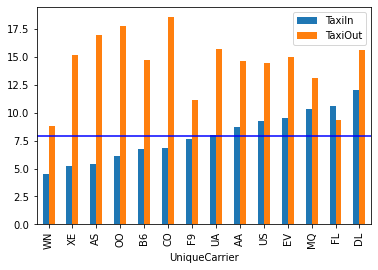

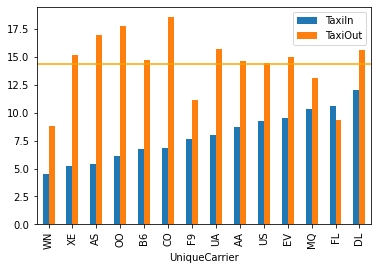

In [6]:
# Used bar chart to display the average TaxiIn and TaxiOut time of Uniquecarrier
sub_avg_df_1.plot.bar().axhline(y = avg_all_taxiIn_taxiOut_df['TaxiIn'], color = "blue")
sub_avg_df_1.plot.bar().axhline(y = avg_all_taxiIn_taxiOut_df['TaxiOut'], color = "orange")

**Results**

**From the results above it can be stated that the carrier UA, AA, US, EV, MQ, FL, and DL have the average higher TaxiIn time from all the carriers.**

**<li>1_2 Finding out the flight numbers those are belongs to carrier UA, AA, US, EV, MQ, FL, and DL**

**Data Preparation**

In [7]:
#Finding out the carriers with higher average TaxiIn time form all the carriers
TaxiIn_lrg_mean_carriers = sub_avg_df_1[sub_avg_df_1['TaxiIn'] >= avg_all_taxiIn_taxiOut_df['TaxiIn']].index
                                        
TaxiIn_lrg_mean_carriers

Index(['UA', 'AA', 'US', 'EV', 'MQ', 'FL', 'DL'], dtype='object', name='UniqueCarrier')

**Exploratory Data Analysis**

In [8]:
# Finding out the flight numbers belongs to the above carriers 
sub_df_1_2 = dflights_df[dflights_df['UniqueCarrier'].isin(TaxiIn_lrg_mean_carriers.to_list())][['Year', 'Month','DayofMonth', 'UniqueCarrier', 'FlightNum', 'TaxiIn']]

# Finding out the flight number with higher TaxiIn time among all the flight numbers. 
lt_fn_df = sub_df_1_2[sub_df_1_2['TaxiIn'] > avg_all_taxiIn_taxiOut_df['TaxiIn']]

lt_fn_df

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,TaxiIn
3,2011,1,4,AA,428,9.0
4,2011,1,5,AA,428,9.0
6,2011,1,7,AA,428,12.0
8,2011,1,9,AA,428,8.0
10,2011,1,11,AA,428,8.0
...,...,...,...,...,...,...
19140,2011,2,13,AA,2185,9.0
19143,2011,2,16,AA,2185,10.0
19144,2011,2,17,AA,2185,16.0
19145,2011,2,18,AA,2185,9.0


**Results**

From the data above it can be stated that 971 flight numbers those are belongs to carrier UA, AA, US, EV, MQ, FL, and DL hold the higher average TaxiIn time from all the carrier at 7.9.
I would suggest travlers to choose other carriers to avoid waiting on plane to take off. 

**Part - 2**


**Finding out the carriers with the highest arrival delays**

*A flight is considered on time even if it is arrive 15 minutes after its scheduled arrival time*

**Data Preparation**

<ol>
<li>Create Sub Dataframe</li>
<li>Delete all the carriers of those are contain ArrDelay value NaN</li>
<li>Finding out all the ArrDelay higher then 15</li>
<li>Calculate mean of ArrDelay groupby Uniquecarrier</li>

**Exploratory Data Analysis**

In [23]:
# Create Sub dataframe
arr_delay_df = dflights_df[['Year', 'Month', 'DayofMonth', 'UniqueCarrier',
                                'FlightNum', 'ArrDelay', 'DepDelay']]
# Delete all the those contain ArrDelay value is NaN
no_nan_arr_delay_df = arr_delay_df.dropna()

# Finding out all the ArrDelay higher then 15
le_15_delay_df = no_nan_arr_delay_df[no_nan_arr_delay_df['ArrDelay'] >= 15]
    
# Calculate mean of ArrDelay groupby Uniquecarrier
group_carrier_avg_df = le_15_delay_df[['UniqueCarrier', 'ArrDelay']].groupby('UniqueCarrier').mean().sort_values(by = 'ArrDelay', ascending = False)
                    
group_carrier_avg_df

,ArrDelay
UniqueCarrier,
EV,103.900000
B6,84.619048
DL,59.384615
MQ,55.430556
US,49.541667
AA,45.519481
CO,40.788269
UA,39.928571
OO,39.290541


**Research Result**


**From the data above it can be stated that Carrier EV, B6, DL, and MQ have the higher average delay in time compares to other carrires at 103.90, 84.61, 59.38, and 55.43, respectively. On the other hand carrier F9, FL, XE, and AS have the lower average delay in time at 34.09, 36.50, 37.32, and 37.44, respectively. I would suggest pressengers to choose lower average delay in time carriers.** 

**Part - 3**

*Finding out the most frequent travel destination*

*I have broken down part 3 into 3 parts*

<ol>
<li>Find out the airport with the highest number of flights</li>
<li>Carriers with the highest number of flights</li>
<li>Most frequent destination from HOU and IAH


*1: Find out the airport with the highest number of flights*

**Data Preparation**

In [18]:
# To create sub Dataframe
sub_df_2 = dflights_df[[ 'Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest']]
sub_df_2.head(5)

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,Origin,Dest
0,2011,1,1,AA,428,IAH,DFW
1,2011,1,2,AA,428,IAH,DFW
2,2011,1,3,AA,428,IAH,DFW
3,2011,1,4,AA,428,IAH,DFW
4,2011,1,5,AA,428,IAH,DFW


*2: Carriers with the highest number of flights*

In [19]:
# To calculate the flights origin
orgn_df = sub_df_2.groupby(['Origin']).size()

orgn_df

Origin
HOU     4319
IAH    15681
dtype: int64

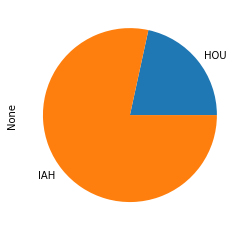

In [5]:
# Display the finding with bar chart
orgn_df.plot.pie()


**From the data above it can be said that IAH holds the much higher number of flights orgin compare to HOU at 1581 and 4319, respectively. IAH holds flights origin of 263% higher then HOU.** 

*2: Finding out the most frequent flights deatination*


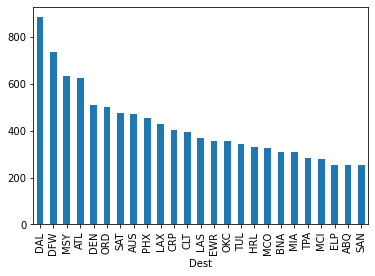

In [21]:
# To find out the number of flights to the destinations
dest_df = sub_df_2.groupby(['Dest']).size()
dest_df
# Display the result in bar chart
dest_df.sort_values(ascending = False).head(25).plot.bar()

**From the chart above it can be stated that DAL, DFW, MSY are most frequent destinations among other destinations.**

 *Finding out the most frequent destination from HOU airport*

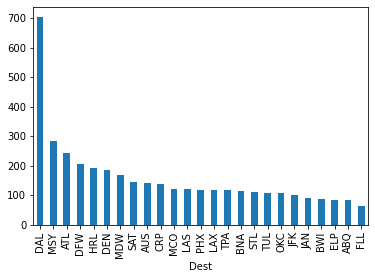

In [22]:
# Finding out the number of from HOU
dest_df = sub_df_2[sub_df_2['Origin'] == 'HOU'].groupby(['Dest']).size()
# Display the results with bar chart
dest_df.sort_values(ascending = False).head(25).plot.bar()

**From the chart above it can be said that DAL is the most frequent destination from HOU airport, which is twice as much as other destinations.** 

*Finding out the most frequent destinations from IAH airport*

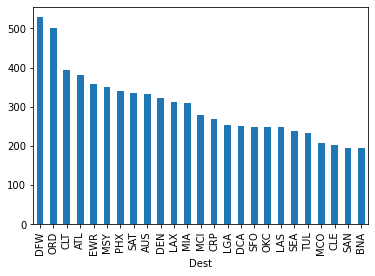

In [23]:
# Finding out the number of from IAH
dest_df = sub_df_2[sub_df_2['Origin'] == 'IAH'].groupby(['Dest']).size()
# Display the results with bar chart
dest_df.sort_values(ascending = False).head(25).plot.bar()

**From the chart above it can be stated that DFW and ORD are the most frequent destination from IAH airport.**

**To conclude**

<li>Carriers UA, AA, US, EV, MQ, FL, and DL have the average higher TaxiIn time from all the carriers</li>
<li>Carrier EV, B6, DL, and MQ have the higher average delay in time compares to other carrires at 103.90, 84.61, 59.38, and 55.43, respectively</li>
<li> DAL is the most frequent destination from HOU airport, which is twice as much as other destinations</li>
<li>DFW and ORD are the most frequent destination from IAH airport</li>


